In [ ]:
# import the necessary packages
from skimage.measure import compare_ssim as ssim 
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [17]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
Cat_1 = cv2.imread("/content/Cat 1.jpg")
Cat_2 = cv2.imread("/content/Cat 2.jpg")
Cat_3 = cv2.imread("/content/Cat 3.jpg")
#Resize the images
Cat_1 = cv2.resize(Cat_1,(300,300))
Cat_2 = cv2.resize(Cat_2,(300,300))
Cat_3 = cv2.resize(Cat_3,(300,300))

# convert the images to grayscale
Cat_1 = cv2.cvtColor(Cat_1, cv2.COLOR_BGR2GRAY)
Cat_2 = cv2.cvtColor(Cat_2, cv2.COLOR_BGR2GRAY)
Cat_3 = cv2.cvtColor(Cat_3, cv2.COLOR_BGR2GRAY)

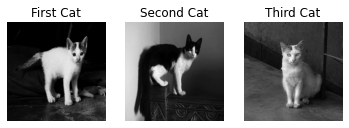

In [18]:
# initialize the figure
fig = plt.figure("Images")
images = ("First Cat", Cat_1), ("Second Cat", Cat_2), ("Third Cat", Cat_3)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


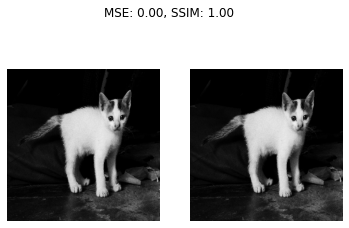

In [16]:
compare_images(Cat_1,Cat_1, 'Same cats')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


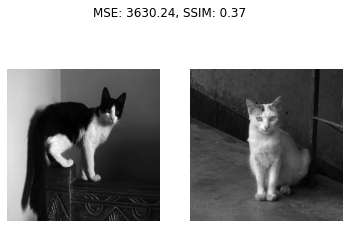

In [ ]:
compare_images(Cat_2,Cat_3, 'Different cats')

 **PSNR Evaluation with original vs compressed images** 

In [52]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
im1 = cv2.imread("/content/Original.jpg")
im2 = cv2.imread("/content/Compressed.jpg", 1)
original = cv2.resize(im1,(300,300))
compressed = cv2.resize(im2,(300,300))
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 32.17465232608188 dB
